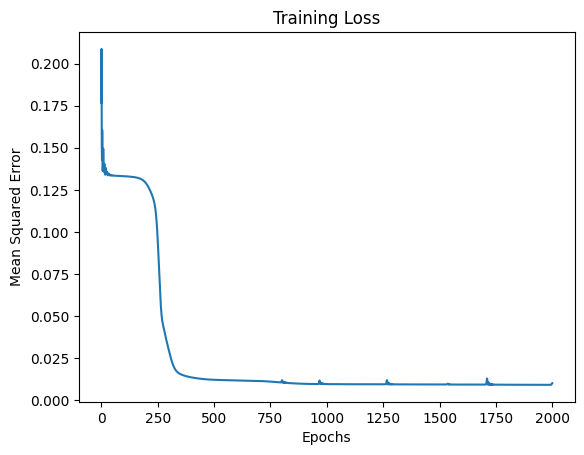

Predictions:
Input: 0.20000000298023224, Predicted Output: 0.4547915458679199
Input: 0.5, Predicted Output: -0.052249662578105927
Input: 0.800000011920929, Predicted Output: -0.4471170902252197


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data with a nonlinear relationship
torch.manual_seed(0)
X = torch.rand(100, 1)  # Input features
y = 0.5 * torch.sin(4 * np.pi * X) + 0.2 * torch.sin(12 * np.pi * X) + 0.1 * torch.randn(100, 1)


# Define a simple neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 50)  # Input size: 1, Output size: 10
        self.fc2 = nn.Linear(50, 50)  # Input size: 1, Output size: 10
        self.fc3 = nn.Linear(50, 1)  # Input size: 10, Output size: 1

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()

# Define loss and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=0.005)  # Adam optimizer with learning rate 0.01

# Train the model
loss_history = []  # To store the training loss at each epoch
for epoch in range(2000):
    optimizer.zero_grad()  # Reset gradients to zero
    outputs = model(X)  # Perform a forward pass to get predictions
    loss = criterion(outputs, y)  # Calculate the mean squared error loss
    loss.backward()  # Perform backpropagation to compute gradients
    optimizer.step()  # Update model parameters using the optimizer
    loss_history.append(loss.item())  # Append the current loss value to the history list


# Plot the training loss
plt.plot(range(2000), loss_history)  # Use loss_history instead of loss.detach().numpy()
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss')
plt.show()


# Make predictions
X_test = torch.tensor([[0.2], [0.5], [0.8]])
predictions = model(X_test)

print("Predictions:")
for i, x in enumerate(X_test):
    print(f"Input: {x[0]}, Predicted Output: {predictions[i][0]}")


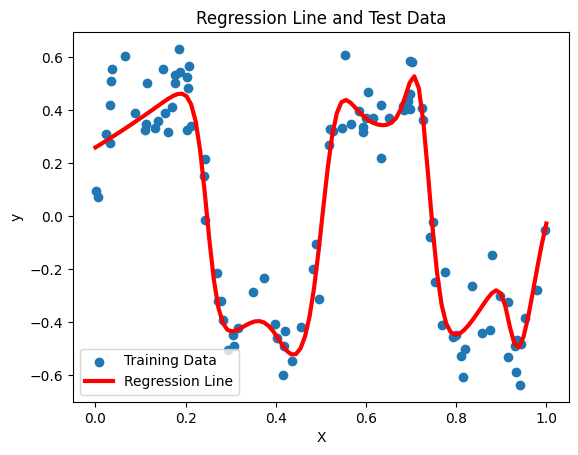

In [ ]:

# Generate a larger set of test data
X_test_large = torch.linspace(0, 1, 100).unsqueeze(1)  # Creating 100 evenly spaced values between 0 and 1
predictions_large = model(X_test_large)

# Plot the regression line along with the test data
plt.scatter(X.numpy(), y.numpy(), label='Training Data')
plt.plot(X_test_large.numpy(), predictions_large.detach().numpy(), color='red', linewidth=3, label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression Line and Test Data')
plt.legend()
plt.show()